# Classification
## Simple models and metrics

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_pickle(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\train_prep.pkl')
test = pd.read_pickle(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\test_prep.pkl')

In [3]:
train.head()

,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,TabbyColor,MixBreed,...,Breed_German Shepherd Mix,Breed_Labrador Retriever Mix,Breed_Pit Bull Mix,Breed_Rare,Sex_Female,Sex_Male,Sex_Unknown,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown
0,1,365.0,1,7,0.000157,1,0.032919,0.463624,0,1,...,0,0,0,1,0,1,0,1,0,0
1,0,365.0,1,5,0.000655,0,0.008092,0.015005,1,1,...,0,0,0,0,1,0,0,1,0,0
2,1,730.0,1,6,0.000052,1,0.026293,0.357521,0,1,...,0,0,1,0,0,1,0,1,0,0
3,0,21.0,0,0,0.285871,0,0.000471,0.058418,0,1,...,0,0,0,0,0,1,0,0,1,0
4,1,730.0,0,0,0.285871,0,0.023831,0.075353,0,0,...,0,0,0,1,0,1,0,1,0,0


In [5]:
outcome = pd.read_csv(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\train.csv', usecols=['OutcomeType']).squeeze('columns')

In [6]:
outcome.unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'],
      dtype=object)

In [7]:
outcome.value_counts(normalize=True)

OutcomeType
Adoption           0.402896
Transfer           0.352501
Return_to_owner    0.179056
Euthanasia         0.058177
Died               0.007370
Name: proportion, dtype: float64

Train-Test Split for binary classification
--

In [8]:
X = train
y = 1.0 * (outcome == 'Return_to_owner')

y.mean()

0.1790564555351865

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
Xtr.shape, Xval.shape

((22719, 31), (4010, 31))

## Constant prediction

We will use a dummy approach
$$p(x) = 0.5,$$

where $x$ -- all our features that we've calculated in the previous class.

And we will use log loss to evaluate our predictions. Log-loss is 

$$L = -\frac{1}{N}\sum_{i=1}^N \left[y_ip(x_i) + (1-y_i)(1-p(x_i))\right]$$

where $y = \{\text{outcome=Return to owner} \} \in \{0, 1\}$.

In [12]:
from sklearn.metrics import log_loss

In [14]:
const = np.ones(shape=(Xval.shape[0], 1)) * 0.5


array([[0.5],
       [0.5],
       [0.5],
       ...,
       [0.5],
       [0.5],
       [0.5]])

#### Task: Check what log loss we have with dummy constant prediction

In [16]:
answer = log_loss(y_true=yval,  y_pred=const)
print('Const model log-loss: {:.3f}'.format(answer))

Const model log-loss: 0.693


Then let's modify our approach and use 
$$p(x) = \frac{1}{N}\sum_{i=1}^N y_i$$

#### Task: Calculate such vector of constant predictions and check its log loss

In [23]:
probas = 

In [24]:
probas

array([[0.82111889, 0.17888111],
       [0.82111889, 0.17888111],
       [0.82111889, 0.17888111],
       ...,
       [0.82111889, 0.17888111],
       [0.82111889, 0.17888111],
       [0.82111889, 0.17888111]])

In [25]:
probas[:, 1]

array([0.17888111, 0.17888111, 0.17888111, ..., 0.17888111, 0.17888111,
       0.17888111])

In [27]:
answer = 
print('Modified const model log-loss: {:.3f}'.format(answer))

Modified const model log-loss: 0.471


## Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtr_scaled = scaler.fit_transform(Xtr)
Xval_scaled = scaler.transform(Xval)

## Logistic Regression

The model:

$$p(x) = \frac{e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2 \dots }}{1 + e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2 \dots }} = sigmoid(\beta_0 + \beta_1 x_1 + \beta_2 x_2 \dots)$$

In short, the model is simply [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) applied to the output of a linear model.


Pros:
- simple
- interpretable
- allows inference
- work easily with big data
- efficient in terms of learning speed
- easily regularized

Cons:
- assumptions of logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

LogisticRegression()

LogisticRegression()

#### Task: Fit the model (Ridge) on scaled data. What's the difference between Ridge and Lasso regularization?

In [ ]:
pass

#### Task: Do predictions of classes and probabilities separately

In [35]:
y_pred = pass

y_pred_probas = pass

In [36]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [37]:
y_pred_probas

array([[0.39144146, 0.60855854],
       [0.9939247 , 0.0060753 ],
       [0.99502944, 0.00497056],
       ...,
       [0.76103567, 0.23896433],
       [0.95498404, 0.04501596],
       [0.77589832, 0.22410168]])

In [38]:
scores = y_pred_probas[:,1]

scores

array([0.60855854, 0.0060753 , 0.00497056, ..., 0.23896433, 0.04501596,
       0.22410168])

#### Task: Check what log loss we have with logistic regression

In [29]:
answer = pass
print('Logreg log-loss: {:.3f}'.format(answer))

Logreg log-loss: 0.379


## Metrics for binary classification

Finally, we can plot the **confusion matrix** of our test predictions.

![image.png](https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816)

Confusion matrix is a nececary tool for analysing a classifier performance.

It allows us to compute [different metrics of performance](https://en.wikipedia.org/wiki/Precision_and_recall) such as:

**Accuracy**: $(TP + TN)/(TP + TN + FP + FN)$ -- the fraction of predictions our model got right

**Precision**: $TP/ (TP + FP)$ -- What proportion of positive identifications was actually correct?

**Recall**: $TP / (TP + FN)$ -- What proportion of actual positives was identified correctly?

[**Balanced accuracy** (resistant to class imbalance)](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report

#### Task: calculate the confusion matrix

Hint: use `confusion_matrix`

In [31]:
a = pass
a

array([[3187,  101],
       [ 611,  111]])

In [32]:
print('accuracy = {:.3f}'.format(pass)
print('accuracy_score(yval, y_pred) = {:.3f}'.format(pass))

accuracy = 0.822
accuracy_score(yval, y_pred) = 0.822


#### Task: calculate precision and recall by hands and with `precision_score` and `recall_score` functions

In [33]:
print('precision = {:.3f}'.format(pass))
print('precision_score(yval, y_pred) = {:.3f}'.format(pass))

precision = 0.524
precision_score(yval, y_pred) = 0.524


In [34]:
print('recall = {:.3f}'.format(pass))
print('recall_score(yval, y_pred) = {:.3f}'.format(pass))

recall = 0.154
recall_score(yval, y_pred) = 0.154


In [35]:
print(classification_report(yval, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      3288
         1.0       0.52      0.15      0.24       722

    accuracy                           0.82      4010
   macro avg       0.68      0.56      0.57      4010
weighted avg       0.78      0.82      0.78      4010



## Choosing the right classification treshold

Logistic Regression outputs probabilities, but we are interested in predicting classes. The simple solution is to threshold probabilities at $0.5$ as we did earlier. If the probability is $>= 0.5$ we predict class $1$.

But for some tasks you might want different thresholds. If you are classifying whether bank clients will default or not, you might want to act whenever the probability of default is over $0.2$. If, on the other hand, the action you take if a model predicts $1$ is very expensive, you might want to set the threshold at $0.9$ so that you only act when you are very sure you need to.

If you just want the best accuracy score, you want to try different thresholds and see which does best.

Let's try some classification thresholds:

In [49]:
scores

array([0.60855854, 0.0060753 , 0.00497056, ..., 0.23896433, 0.04501596,
       0.22410168])

In [50]:
1*(scores >= 0.2)

array([1, 0, 0, ..., 1, 0, 1])

In [52]:
threshold = 0.2

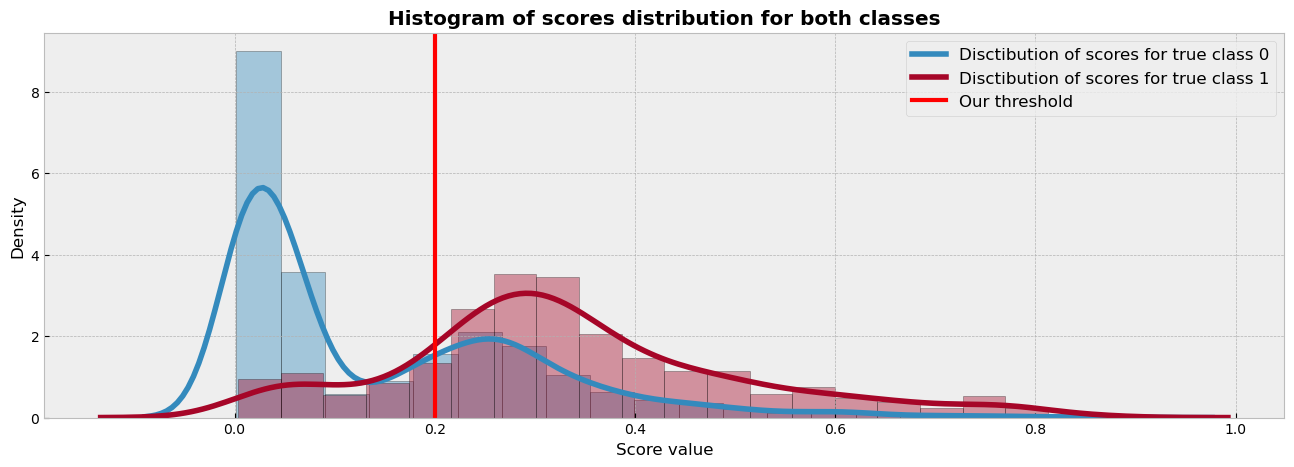

In [59]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(scores[yval == 0], hist=True, kde=True, 
             bins=20,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(scores[yval == 1], hist=True, kde=True, 
             bins=20,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.axvline(threshold, color='red', linewidth=3)

plt.title("Histogram of scores distribution for both classes", weight="bold")

plt.xlabel("Score value")

plt.legend(['Disctibution of scores for true class 0',
           'Disctibution of scores for true class 1', 'Our threshold'], fontsize=12)

plt.show();

#### Task: calculate metrics for 100 different thresholds from 0 to 1

In [60]:
tr = np.linspace(0, 1, 100)

p = np.zeros_like(tr)
r = np.zeros_like(tr)
f = np.zeros_like(tr)

pass

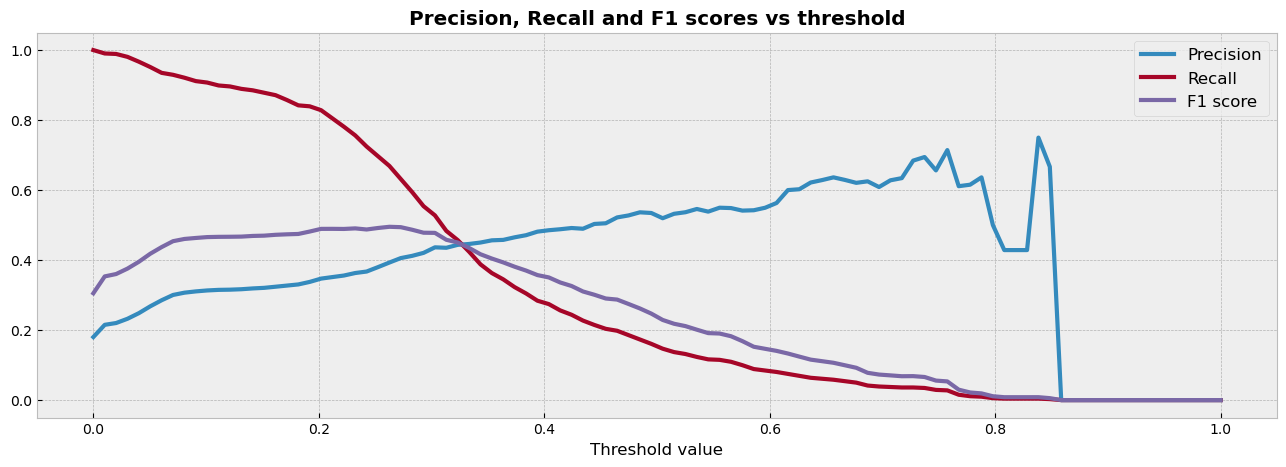

In [61]:
fig = plt.figure(figsize=(16, 5))

plt.plot(tr, p, linewidth=3)
plt.plot(tr, r, linewidth=3)
plt.plot(tr, f, linewidth=3)

plt.title("Precision, Recall and F1 scores vs threshold", weight="bold")

plt.xlabel("Threshold value")

plt.legend(['Precision', 'Recall', 'F1 score'], fontsize=12)

plt.show()

### ROC-AUC

Binary classifiaction problem:

$$a(x; t) = \begin{cases}
		-1, \, b(x) \le  t,\\
		+1, \, b(x) > t,
	\end{cases}$$
    
Each algorithm (obtained by fixing the threshold value $t$) is represented by a point on the surface (FPR, TPR)
	$$\text{FPR} = \frac{\text{FP}}{\text{FP}+\text{TN}} = \frac{\text{FP}}{\ell_-},$$
	$$\text{TPR} = \frac{\text{TP}}{\text{TP}+\text{FN}} = \frac{\text{TP}}{\ell_+},$$
	$\ell_-, \ell_+$ — the number of objects of negative and positive classes, respectively. AUC-ROC, in turn, is the area under the resulting curve.

#### Task
Let's give a sample $X$ consisting of 5 objects, and a classifier $b(x)$ predicting the probability of a positive class for an object. The predictions of $b(x)$ and the ground truth labels of objects are given below:
\begin{align*}
&b(x_1) = 0.2, \quad y_1 = -1,\\
&b(x_2)= 0.4, \quad y_2= +1,\\
&b(x_3) = 0.1, \quad y_3 = -1,\\
&b(x_4) = 0.7, \quad y_4 = +1,\\
&b(x_5) = 0.05, \quad y_5 = +1.\\
\end{align*}
Calculate AUC-ROC for the set of classifiers $a(x;t)$ generated by $b(x)$ on a sample of $X$.

How many thresholds do we need to iterate over to build a curve in this task?

## Unbalanced classes

Let's consider the problem of separating mathematical articles from a variety of scientific articles.
Let's assume that there are $1.000.100$ articles in total, of which only $100$ relate to mathematics.
If we manage to build an algorithm $a(x)$ that ideally solves the problem,
then its TPR=1, and FPR=0.


Let's now consider a bad algorithm that gives a positive answer to $95$ mathematical
and $50,000$ non-mathematical articles.
Such an algorithm is completely useless, but it has $\text{TPR} = 0.95$
and $\text{FPR} = 0.05$, which is extremely close to the ideal algorithm.

Thus, if the positive class is significantly smaller in size,
then AUC-ROC may give an inadequate assessment of the quality of the algorithm,
since it measures the proportion of incorrectly accepted objects relative
to the total number of negative ones.
So, the algorithm $b(x)$, placing $100$ of relevant documents
in positions from $50.001$ to $50.101$, will have a ROC-AUC of $0.95$.

### Precision-Recall curve

To overcome this issue we can use Precision-Recall curve.

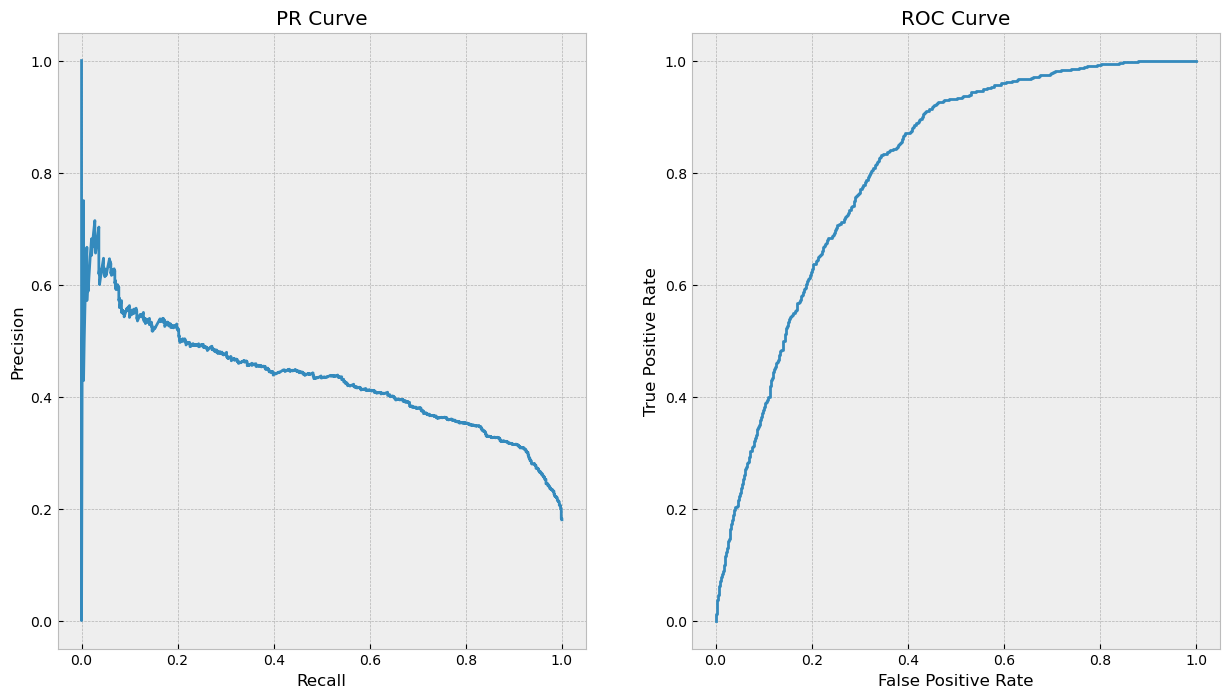

In [62]:
from sklearn.metrics import precision_recall_curve, roc_curve

p, r, _ = precision_recall_curve(yval, scores)
tpr, fpr, _ = roc_curve(yval, scores)

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
    
ax1.plot(r,p)
ax2.plot(tpr,fpr)

plt.show()

## k-Nearest Neighbors


K – Nearest Neighbours is a non – linear classifier (and hence, the prediction boundary is non-linear) that predicts which class a new test data point belongs to by identifying its k nearest neighbors’ class. We select these k nearest neighbors based on Euclidean distance. Among these k neighbours, the number of data points in each category is counted, and the new data point is assigned to that category where we got the most neighbours in.

Prediction:
 $$\hat{f}(x_i) = \frac{1}{k}\sum_{j \in N(x_i)}y_j$$

Pros:
- simple
- non-linear
- can be used for feature engineering

Cons:
- not efficient when data is big
- no inference

In [67]:
from sklearn.neighbors import KNeighborsClassifier

#### Task: fit kNN with raw data and check its performance

Hint: use Xtr.values

In [98]:
print(classification_report(yval, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      3288
         1.0       0.41      0.29      0.34       722

    accuracy                           0.80      4010
   macro avg       0.63      0.60      0.61      4010
weighted avg       0.77      0.80      0.78      4010



#### Task: fit kNN with scaled data and check its performance

In [100]:
print(classification_report(yval, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      3288
         1.0       0.46      0.27      0.34       722

    accuracy                           0.81      4010
   macro avg       0.66      0.60      0.61      4010
weighted avg       0.78      0.81      0.79      4010



#### Task: fit kNN with scaled data for different values of `k` and plot a graph of F1 vs `k`

In [101]:
losses=[]
ks = np.arange(1,201,5)
for k in ks:
    ...

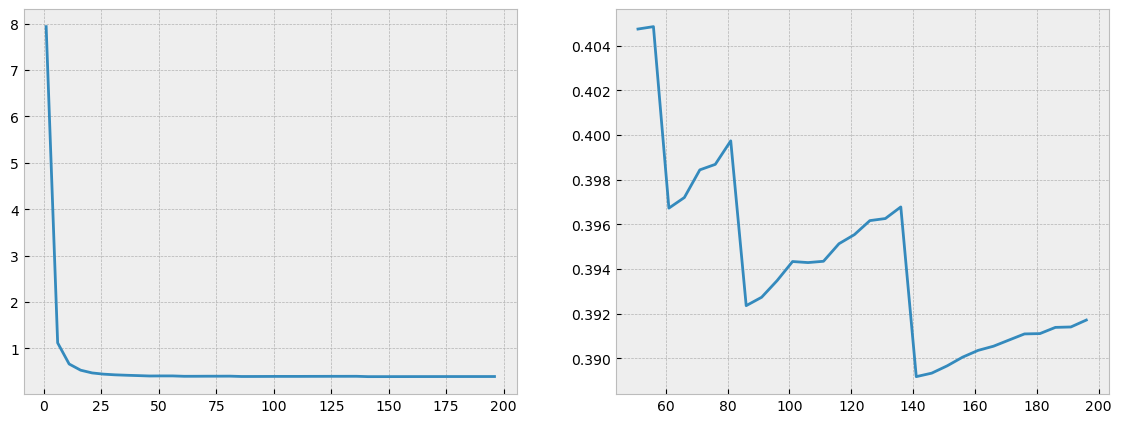

In [102]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
axes[0].plot(ks, losses)
axes[1].plot(ks[10:], losses[10:])

#### Task: find best hyperparameters for KNN

In [61]:
params = {"n_neighbors": np.arange(1,10),
          "metric": ["euclidean", "cityblock"],
         'weights': ['uniform', 'distance']}



pass

Best score: 0.811
Best N neighbors: 9.000
Best Metric: cityblock
Best Weight: distance


## Bonus topic -- Multiclass classification

#### Task: compute macro average and micro average metrics and compare them. Write what's the difference between macro and micro averaging by construction.

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(outcome)

In [33]:
Xtr, Xval, ytr, yval = pass

scaler = pass

Xtr_scaled = pass
Xval_scaled = pass

In [19]:
y_pred_knn_mult = pass

In [22]:
print(classification_report(yval, y_pred_knn_mult))

              precision    recall  f1-score   support

           0       0.62      0.81      0.70      2159
           1       0.00      0.00      0.00        31
           2       0.32      0.12      0.17       322
           3       0.43      0.33      0.38       950
           4       0.71      0.63      0.67      1884

    accuracy                           0.61      5346
   macro avg       0.42      0.38      0.38      5346
weighted avg       0.60      0.61      0.60      5346

